<a href="https://colab.research.google.com/github/Hero0963/kaggle/blob/main/kaggle_explore_multi_label_classification/kaggle_explore_multi_label_classification_improve_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# dataset：https://www.kaggle.com/competitions/playground-series-s3e18/data

In [ ]:
from google.colab import files
files.upload()

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle competitions download -c playground-series-s3e18

 83% 2.00M/2.41M [00:01<00:00, 1.98MB/s]
100% 2.41M/2.41M [00:01<00:00, 2.01MB/s]


In [ ]:
import zipfile
import pandas as pd

# 解壓縮zip檔案
with zipfile.ZipFile('/content/playground-series-s3e18.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/extracted_folder')

In [ ]:
df_train = pd.read_csv('/content/extracted_folder/train.csv')
df_test = pd.read_csv('/content/extracted_folder/test.csv')
df_all = pd.concat([df_train, df_test], ignore_index=True)

In [ ]:
correlations_EC1 = df_train.corr()['EC1'].abs().sort_values(ascending=False)
correlations_EC2 = df_train.corr()['EC2'].abs().sort_values(ascending=False)
EC1_index_list = correlations_EC1.index.tolist()
EC2_index_list = correlations_EC2.index.tolist()
excluded_features = ['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6']

In [ ]:
selected_features_set = set()
for i in range(min(15, len(EC1_index_list))):
    feat = EC1_index_list[i]
    if feat not in excluded_features:
        selected_features_set.add(feat)

for i in range(min(15, len(EC2_index_list))):
    feat = EC2_index_list[i]
    if feat not in excluded_features:
        selected_features_set.add(feat)

In [ ]:
selected_features = [feat for feat in selected_features_set]
print(selected_features)

['PEOE_VSA6', 'fr_COO2', 'VSA_EState9', 'PEOE_VSA10', 'HallKierAlpha', 'MaxAbsEStateIndex', 'EState_VSA2', 'SMR_VSA5', 'PEOE_VSA14', 'NumHeteroatoms', 'PEOE_VSA7', 'SMR_VSA10', 'EState_VSA1', 'fr_COO', 'PEOE_VSA8', 'MinEStateIndex', 'SlogP_VSA3']


In [ ]:
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

In [ ]:
X = df_train[selected_features]
y = df_train['EC1']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
model_xgb_EC1 = xgb.XGBClassifier()
model_xgb_EC1.fit(X_train, y_train)
y_pred = model_xgb_EC1.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.6597645705773916


In [ ]:
X = df_train[selected_features]
y = df_train['EC2']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
model_xgb_EC2 = xgb.XGBClassifier()
model_xgb_EC2.fit(X_train, y_train)
y_pred = model_xgb_EC2.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.5665826731220658


In [ ]:
test_X_EC1 = df_test[selected_features]
predicted_labels_EC1 = model_xgb_EC1.predict_proba(test_X_EC1)[:, 1]

In [ ]:
test_X_EC2 = df_test[selected_features]
predicted_labels_EC2 = model_xgb_EC2.predict_proba(test_X_EC2)[:, 1]

In [ ]:
submission = pd.DataFrame({'id': df_test['id'], 'EC1': predicted_labels_EC1, 'EC2': predicted_labels_EC2})
submission['EC1'] = submission['EC1'].astype(float) # convert_data_type_important
submission['EC2'] = submission['EC2'].astype(float) # convert_data_type_important
submission.to_csv('xgb.csv', index=False)

# all feats

In [ ]:
excluded_features = ['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6']
X = df_train.drop(excluded_features, axis=1)
y = df_train['EC1']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
xgb_EC1_all = xgb.XGBClassifier()
xgb_EC1_all.fit(X_train, y_train)
y_pred = xgb_EC1_all.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.6642816141615642


In [ ]:
importance = xgb_EC1_all.feature_importances_

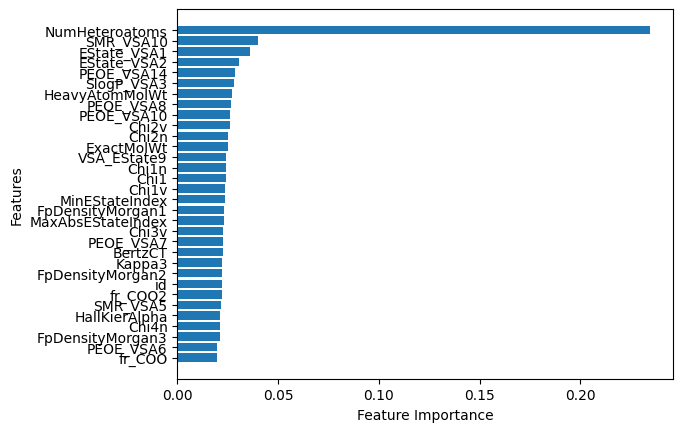

In [ ]:
import matplotlib.pyplot as plt

# 按照特徵重要性的大小對特徵進行排序
feature_names = X.columns
sorted_idx = importance.argsort()

plt.barh(range(len(feature_names)), importance[sorted_idx])
plt.yticks(range(len(feature_names)), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [ ]:
X = df_train[selected_features]
y = df_train['EC1']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)



ROC AUC Score: 0.6333137365033906


In [ ]:
xgb_EC1_600 = xgb.XGBClassifier()
xgb_EC1_600.set_params(n_estimators=600)
xgb_EC1_600.fit(X_train, y_train)
y_pred = xgb_EC1_600.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.6357569108400817


In [ ]:
rf1_1000 = RandomForestClassifier(n_estimators=1000)
rf1_1000.fit(X_train, y_train)
y_pred = rf1_1000.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.6810158153104221


In [ ]:
X = df_train[selected_features]
y = df_train['EC2']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
rf2_1000 = RandomForestClassifier(n_estimators=1000)
rf2_1000.fit(X_train, y_train)
y_pred = rf2_1000.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.5570140111502347


In [ ]:
predicted_labels_EC1 = rf1_1000.predict_proba(test_X_EC1)[:, 1]
predicted_labels_EC2 = rf2_1000.predict_proba(test_X_EC2)[:, 1]
submission = pd.DataFrame({'id': df_test['id'], 'EC1': predicted_labels_EC1, 'EC2': predicted_labels_EC2})
submission['EC1'] = submission['EC1'].astype(float) # convert_data_type_important
submission['EC2'] = submission['EC2'].astype(float) # convert_data_type_important
submission.to_csv('rf_1000.csv', index=False)

# all_feats + rf n_estimators ++

In [ ]:
excluded_features = ['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6']
X = df_train.drop(excluded_features, axis=1)
y_EC1 = df_train['EC1']
y_EC2 = df_train['EC2']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y_EC1, test_size = 0.2, random_state = 42)

In [ ]:
rf1_10000 = RandomForestClassifier(n_estimators=10000)
rf1_10000.fit(X_train, y_train)
y_pred = rf1_10000.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.6941595788893278


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y_EC2, test_size = 0.2, random_state = 42)
rf2_10000 = RandomForestClassifier(n_estimators=10000) # verbose=1
rf2_10000.fit(X_train, y_train)
y_pred = rf2_10000.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.5582185299295774


In [ ]:
test_X_all = df_test

In [ ]:
predicted_labels_EC1 = rf1_10000.predict_proba(test_X_all)[:, 1]
predicted_labels_EC2 = rf2_10000.predict_proba(test_X_all)[:, 1]
submission = pd.DataFrame({'id': df_test['id'], 'EC1': predicted_labels_EC1, 'EC2': predicted_labels_EC2})
submission['EC1'] = submission['EC1'].astype(float) # convert_data_type_important
submission['EC2'] = submission['EC2'].astype(float) # convert_data_type_important
submission.to_csv('rf_10000.csv', index=False)

# how to choose model,  by chatGPT
以下是一些常見的機器學習模型及其適合的場景：  

##隨機森林（Random Forest）：  
高度結構化的數據  
大量特徵或特徵維度較高  
處理缺失值和離群值  
較少的數據預處理需求  

##XGBoost / LightGBM / CatBoost：  
大型數據集  
高性能和快速訓練時間的需求  
處理高維特徵  
處理非線性關係和交互作用  

##支持向量機（Support Vector Machines，SVM）：  
二元分類和多類分類問題  
線性可分或非線性可分的問題  
小型或中型數據集  
較少的特徵數量  

##決策樹（Decision Tree）：  
直觀的可解釋性需求  
非線性關係的問題  
處理分類和回歸問題  
較少的數據預處理需求   

##邏輯回歸（Logistic Regression）：  
二元分類問題  
快速建模和預測的需求  
解釋性需求  
小型或中型數據集

##K最近鄰（K-Nearest Neighbors，KNN）：  
樣本分佈密集的問題  
類別邊界較為模糊的問題  
較少的特徵數量  
較小的數據集  
  
##朴素貝葉斯（Naive Bayes）：  
文本分類問題  
高維特徵空間  
快速建模和預測的需求  
較小的數據集  

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 18.2 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score

excluded_features = ['EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6']
X = df_train.drop(excluded_features, axis=1)

models = {
    # 'Random Forest': RandomForestClassifier(n_estimators=10000),
    # 'XGBoost': XGBClassifier(),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

targets = ['EC1', 'EC2']
for target in targets:
    y = df_train[target]

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        # if model_name == 'XGBoost':
        #     model.set_params(n_estimators=1000)

        model.fit(X_train, y_train)
        y_pred = model.predict_proba(X_val)[:, 1]
        roc_auc = roc_auc_score(y_val, y_pred)
        print(f"ROC AUC Score for {target} using {model_name}: {roc_auc}")

        predicted_labels = model.predict_proba(test_X_all)[:, 1]
        submission = pd.DataFrame({'id': df_test['id'], target: predicted_labels})
        submission[target] = submission[target].astype(float)
        submission.to_csv(f'{model_name}_{target}.csv', index=False)

ROC AUC Score for EC1 using LightGBM: 0.6910238289222463
Learning rate set to 0.02963
0:	learn: 0.6865271	total: 53.2ms	remaining: 53.2s
1:	learn: 0.6803242	total: 58.2ms	remaining: 29s
2:	learn: 0.6744957	total: 62.9ms	remaining: 20.9s
3:	learn: 0.6690391	total: 67.6ms	remaining: 16.8s
4:	learn: 0.6637998	total: 72.5ms	remaining: 14.4s
5:	learn: 0.6588666	total: 77.2ms	remaining: 12.8s
6:	learn: 0.6543706	total: 81.7ms	remaining: 11.6s
7:	learn: 0.6500326	total: 86.4ms	remaining: 10.7s
8:	learn: 0.6458517	total: 91.2ms	remaining: 10s
9:	learn: 0.6419597	total: 95.9ms	remaining: 9.49s
10:	learn: 0.6384033	total: 101ms	remaining: 9.05s
11:	learn: 0.6348418	total: 106ms	remaining: 8.69s
12:	learn: 0.6315718	total: 110ms	remaining: 8.34s
13:	learn: 0.6287247	total: 115ms	remaining: 8.06s
14:	learn: 0.6256106	total: 120ms	remaining: 7.86s
15:	learn: 0.6227991	total: 124ms	remaining: 7.64s
16:	learn: 0.6200908	total: 129ms	remaining: 7.47s
17:	learn: 0.6176756	total: 134ms	remaining: 7.31s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC AUC Score for EC1 using KNN: 0.592595535831852
ROC AUC Score for EC1 using Naive Bayes: 0.6853798390282442
ROC AUC Score for EC2 using LightGBM: 0.5683824823943662
Learning rate set to 0.02963
0:	learn: 0.6812311	total: 5.5ms	remaining: 5.49s
1:	learn: 0.6695239	total: 9.98ms	remaining: 4.98s
2:	learn: 0.6589989	total: 14.6ms	remaining: 4.85s
3:	learn: 0.6490769	total: 19.2ms	remaining: 4.77s
4:	learn: 0.6397897	total: 23.7ms	remaining: 4.72s
5:	learn: 0.6311534	total: 28.3ms	remaining: 4.68s
6:	learn: 0.6229559	total: 32.8ms	remaining: 4.65s
7:	learn: 0.6150667	total: 37.5ms	remaining: 4.65s
8:	learn: 0.6078145	total: 42.4ms	remaining: 4.67s
9:	learn: 0.6007593	total: 47.2ms	remaining: 4.67s
10:	learn: 0.5943607	total: 51.8ms	remaining: 4.66s
11:	learn: 0.5884961	total: 56.6ms	remaining: 4.66s
12:	learn: 0.5827096	total: 61ms	remaining: 4.63s
13:	learn: 0.5775850	total: 65.5ms	remaining: 4.61s
14:	learn: 0.5726435	total: 70.3ms	remaining: 4.62s
15:	learn: 0.5680469	total: 75ms	rem

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ROC AUC Score for EC2 using KNN: 0.539603506455399
ROC AUC Score for EC2 using Naive Bayes: 0.5548430164319249


In [ ]:
import os

models = {
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(),
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

targets = ['EC1', 'EC2']

# 生成檔案路徑
file_paths = []
for model_name, model in models.items():
    for target in targets:
        file_name = f'{model_name}_{target}.csv'
        file_paths.append(file_name)


# 建立字典以儲存合併後的 DataFrame
merged_dfs = {}

# 合併相同模型的檔案
for file_path in file_paths:
    # 提取模型名稱和目標變數
    model_name, target = os.path.splitext(file_path)[0].split('_')

    # 讀取檔案並選取所需的欄位
    df = pd.read_csv(file_path)
    df = df[['id', target]]

    # 檢查是否已有合併的 DataFrame，若無則建立新的 DataFrame
    if model_name in merged_dfs:
        merged_dfs[model_name] = merged_dfs[model_name].merge(df, on='id')
    else:
        merged_dfs[model_name] = df

# 儲存合併後的結果到檔案
for model_name, merged_df in merged_dfs.items():
    file_name = f'merged_{model_name}.csv'
    merged_df.to_csv(file_name, index=False)